In [85]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [86]:
class Image:
    
    def __init__(self, name, image=None, path=None):
        self.name = name
        self.get_image(image, path)
        
        
    def get_image(self, image, path):
        if image:
            self.image = image
            print('Loaded image')
        elif path:
            self.get_image_from_path(path)
            print('Loaded image from path')
        else:
            print('Empty image')
            
    
    def get_image_from_path(self, path):
        img = cv2.imread(path)
        self.image = img[:,:,::-1]
    

    def show(self):
        plt.title(self.name)
        plt.imshow(self.image)

In [87]:
class Eye(Image):
    
    def __init__(self, name_face, image_face, side='right', mirror=False):
        self.name_face = name_face
        self.side = side
        self.mirror = mirror
        self.name_update()
        self.get_eye(image_face)

        
    def get_eye(self, face_image, amplitude=0.45, height=0.1, wide=0.1):
        if self.side == 'right':
            self.image_eye = face_image[round(face_image.shape[0] * height):round(face_image.shape[0] * (height + amplitude)),
                       round(face_image.shape[1] * wide):round(face_image.shape[1] * (amplitude + wide))]
        else:
            self.image_eye = face_image[round(face_image.shape[0] * height):round(face_image.shape[0] * (height + amplitude)),
                       round(face_image.shape[1] * (1 - (amplitude + wide))):round(face_image.shape[1] * (1 - wide))]

        if self.mirror:
            self.mirror_image()
    
    
    def mirror_image(self):
        self.image_eye = cv2.flip(self.image_eye, 1)
        
    
    def name_update(self):
        self.name = self.name_face + '_' + self.side
        if self.mirror:
            self.name = self.name + '_mirror'
        

In [88]:
class Face(Image):
    
    def __init__(self, name, image=None, path=None):
        Image.__init__(self, name, image, path)
        self.get_eyes()
        

    def get_eyes(self):
        

        self.eye1 = Eye(name_face=self.name,
                        image_face=self.image,
                        side='right',
                        mirror=False)
        
        self.eye2 = Eye(name_face=self.name,
                        image_face=self.image,
                        side='left',
                        mirror=True)
        

In [89]:
path='../data/test/profile_test/front6.jpg'

In [90]:
face1 = Face('face1', path=path)

Loaded image from path


AttributeError: 'Eye' object has no attribute 'image'

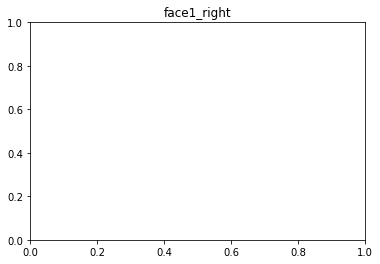

In [92]:
face1.eye1.show()